Predicting Passenger Survival : A Linear Classifier Model

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

import tensorflow as tf


Aim to predict who going to die and who not in data set of titanic 

In [55]:
dftain = pd.read_csv('train.csv')
dfeval = pd.read_csv('eval.csv')

# print(dftain.head())
y_train = dftain.pop('survived')  # POP will remove survived from train.csv and store it in y_train
y_eval = dfeval.pop('survived')

# print(y_train)

#  to seee the partivcular man detail
print(dftain.loc[0],y_train.loc[0])

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


0  mean not survived
1  mean survived

as looking at categoris 
if soome is feamal than chance of surviving it high as how our culture works

younger hava higher chance of surviving 



In [56]:
dftain.describe()
# dftain.shape

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


And if we want a more statistical analysis of our data we can use the .describe() method.

GRAPHS

<Axes: >

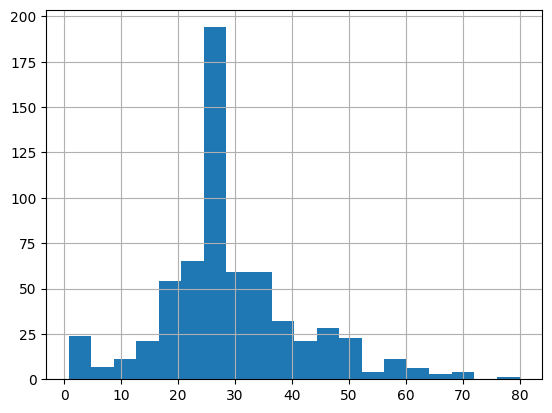

In [57]:
dftain.age.hist(bins=20)
# dftain['class'].value_counts().plot(kind='barh')
# dftain.sex.value_counts().plot(kind='barh')

Training Data

In [58]:
CATEGORIAL_COL = ['sex', 'n_siblings_spouses',
                  'parch', 'class', 'deck', 'embark_town', 'alone']

NUMERIC_COLUMS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORIAL_COL:
    # gets a lsit of all unique values from given feature column
    vocabulary = dftain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

#dftain['sex'].unique()


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

TRAINING PROCESSS

An epoch is simply one stream of our entire dataset. The number of epochs we define is the amount of times our model will see the entire dataset. We use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it.

Ex. if we have 10 ephocs, our model will see the same dataset 10 times.

Since we need to feed our data in batches and multiple times, we need to create something called an input function. The input function simply defines how our dataset will be converted into batches at each epoch.

INPUT FUNCTION

The TensorFlow model we are going to use requires that the data we pass it comes in as a tf.data.Dataset object. This means we must create a input function that can convert our current pandas dataframe into that object.

num_epochs = no of time we will look at code while training 

shuffle =  shuffling of data

batch_size 32 = mean 32 data at a time 



In [59]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():  # inner function, this will be returned
        # create tf.data.Dataset object with data and its label
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)  # randomize order of data
        # split dataset into batches of 32 and repeat process for number of epochs
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds  # return a batch of the dataset
    return input_function  # return a function object for use


# here we will call the input_function that was returned to us to get a dataset object we can feed to the model
train_input_fn = make_input_fn(dftain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

CREATING MODEL



In [60]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\HP\\AppData\\Local\\Temp\\tmpoeupwtuj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Training the model


In [61]:
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy']*100)

print(result)

75.75757503509521
{'accuracy': 0.75757575, 'accuracy_baseline': 0.625, 'auc': 0.83804715, 'auc_precision_recall': 0.7787977, 'average_loss': 0.47453308, 'label/mean': 0.375, 'loss': 0.4654312, 'precision': 0.68817204, 'prediction/mean': 0.3430092, 'recall': 0.64646465, 'global_step': 200}


Now let's see how we can actually use this model to make predicitons.

We can use the .predict() method to get survival probabilities from the model. This method will return a list of dicts that store a predicition for each of the entries in our testing data set. Below we've used some pandas magic to plot a nice graph of the predictions.

In [62]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[2])
print(y_eval.loc[2])
print(result[2]['probabilities'])
# 2 mean second person status
# 1 mean survived , 0 mean not survived
#ans [0.20055343 0.7994466 ] chance of not surviving and chance of surviving

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HP\AppData\Local\Temp\tmpoeupwtuj\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
1
[0.4226498  0.57735026]
